# **Housing Sale Price dataset analysis**
###(dataset is from Kaggle)

---



In [ ]:
# We will attempt to accurately predict housing sale prices by evaluating different regression and machine learning models.

# First, we will import some packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import folium
import scipy.stats as stats
from folium.plugins import HeatMap
from numpy.ma.core import mean
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### Upload Dataset

In [ ]:
# Google Colab file upload formatting

from google.colab import files

uploaded = files.upload()

#Kaggle formatting

#data = pd.read_csv('/kaggle/input/miami-housing-dataset/miami-housing.csv')

#Juptyer notebook formatting

#data = pd.read_csv('/Users/billypacetti/Desktop/Datasets')

Saving miami-housing.csv to miami-housing (1).csv


In [ ]:
# Check that the dataframe uploaded properly and assign to a variable

data = pd.read_csv('miami-housing.csv')

data.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [ ]:
# Get a summary of the dataframe

data.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Columns: 17 entries, LATITUDE to structure_quality
dtypes: float64(9), int64(8)
memory usage: 1.8 MB


## Data Cleaning



In [ ]:
# Check the shape of the data

data.shape

(13932, 17)

In [ ]:
# Check data types to see if variables are numeric or string

data.dtypes

LATITUDE             float64
LONGITUDE            float64
PARCELNO               int64
SALE_PRC             float64
LND_SQFOOT             int64
TOT_LVG_AREA           int64
SPEC_FEAT_VAL          int64
RAIL_DIST            float64
OCEAN_DIST           float64
WATER_DIST           float64
CNTR_DIST            float64
SUBCNTR_DI           float64
HWY_DIST             float64
age                    int64
avno60plus             int64
month_sold             int64
structure_quality      int64
dtype: object

The inclusion of string variables would've prompted us to create dummy variables for them.

In [ ]:
# Check for missing data

data.isnull().sum()

LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64

In [ ]:
# Check for duplicate data

data.duplicated().sum()

0

In [ ]:
# PARCELNO is an identifier column, and should be dropped as it's irrelevant to the analysis

data = data.drop(['PARCELNO'], axis=1)

In [ ]:
# Check that PARCELNO column was dropped

list(data.columns)

['LATITUDE',
 'LONGITUDE',
 'SALE_PRC',
 'LND_SQFOOT',
 'TOT_LVG_AREA',
 'SPEC_FEAT_VAL',
 'RAIL_DIST',
 'OCEAN_DIST',
 'WATER_DIST',
 'CNTR_DIST',
 'SUBCNTR_DI',
 'HWY_DIST',
 'age',
 'avno60plus',
 'month_sold',
 'structure_quality']

## Exploratory Data Analysis

### Summary Statistics

In [ ]:
# Get the summary statistics

data.describe()

,LATITUDE,LONGITUDE,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


We can see that the mean sale price for houses is 399,000 USD, while the median price is 310,000 USD. There are likely some very high priced homes that are skewing the mean.

### Univariate Statistics

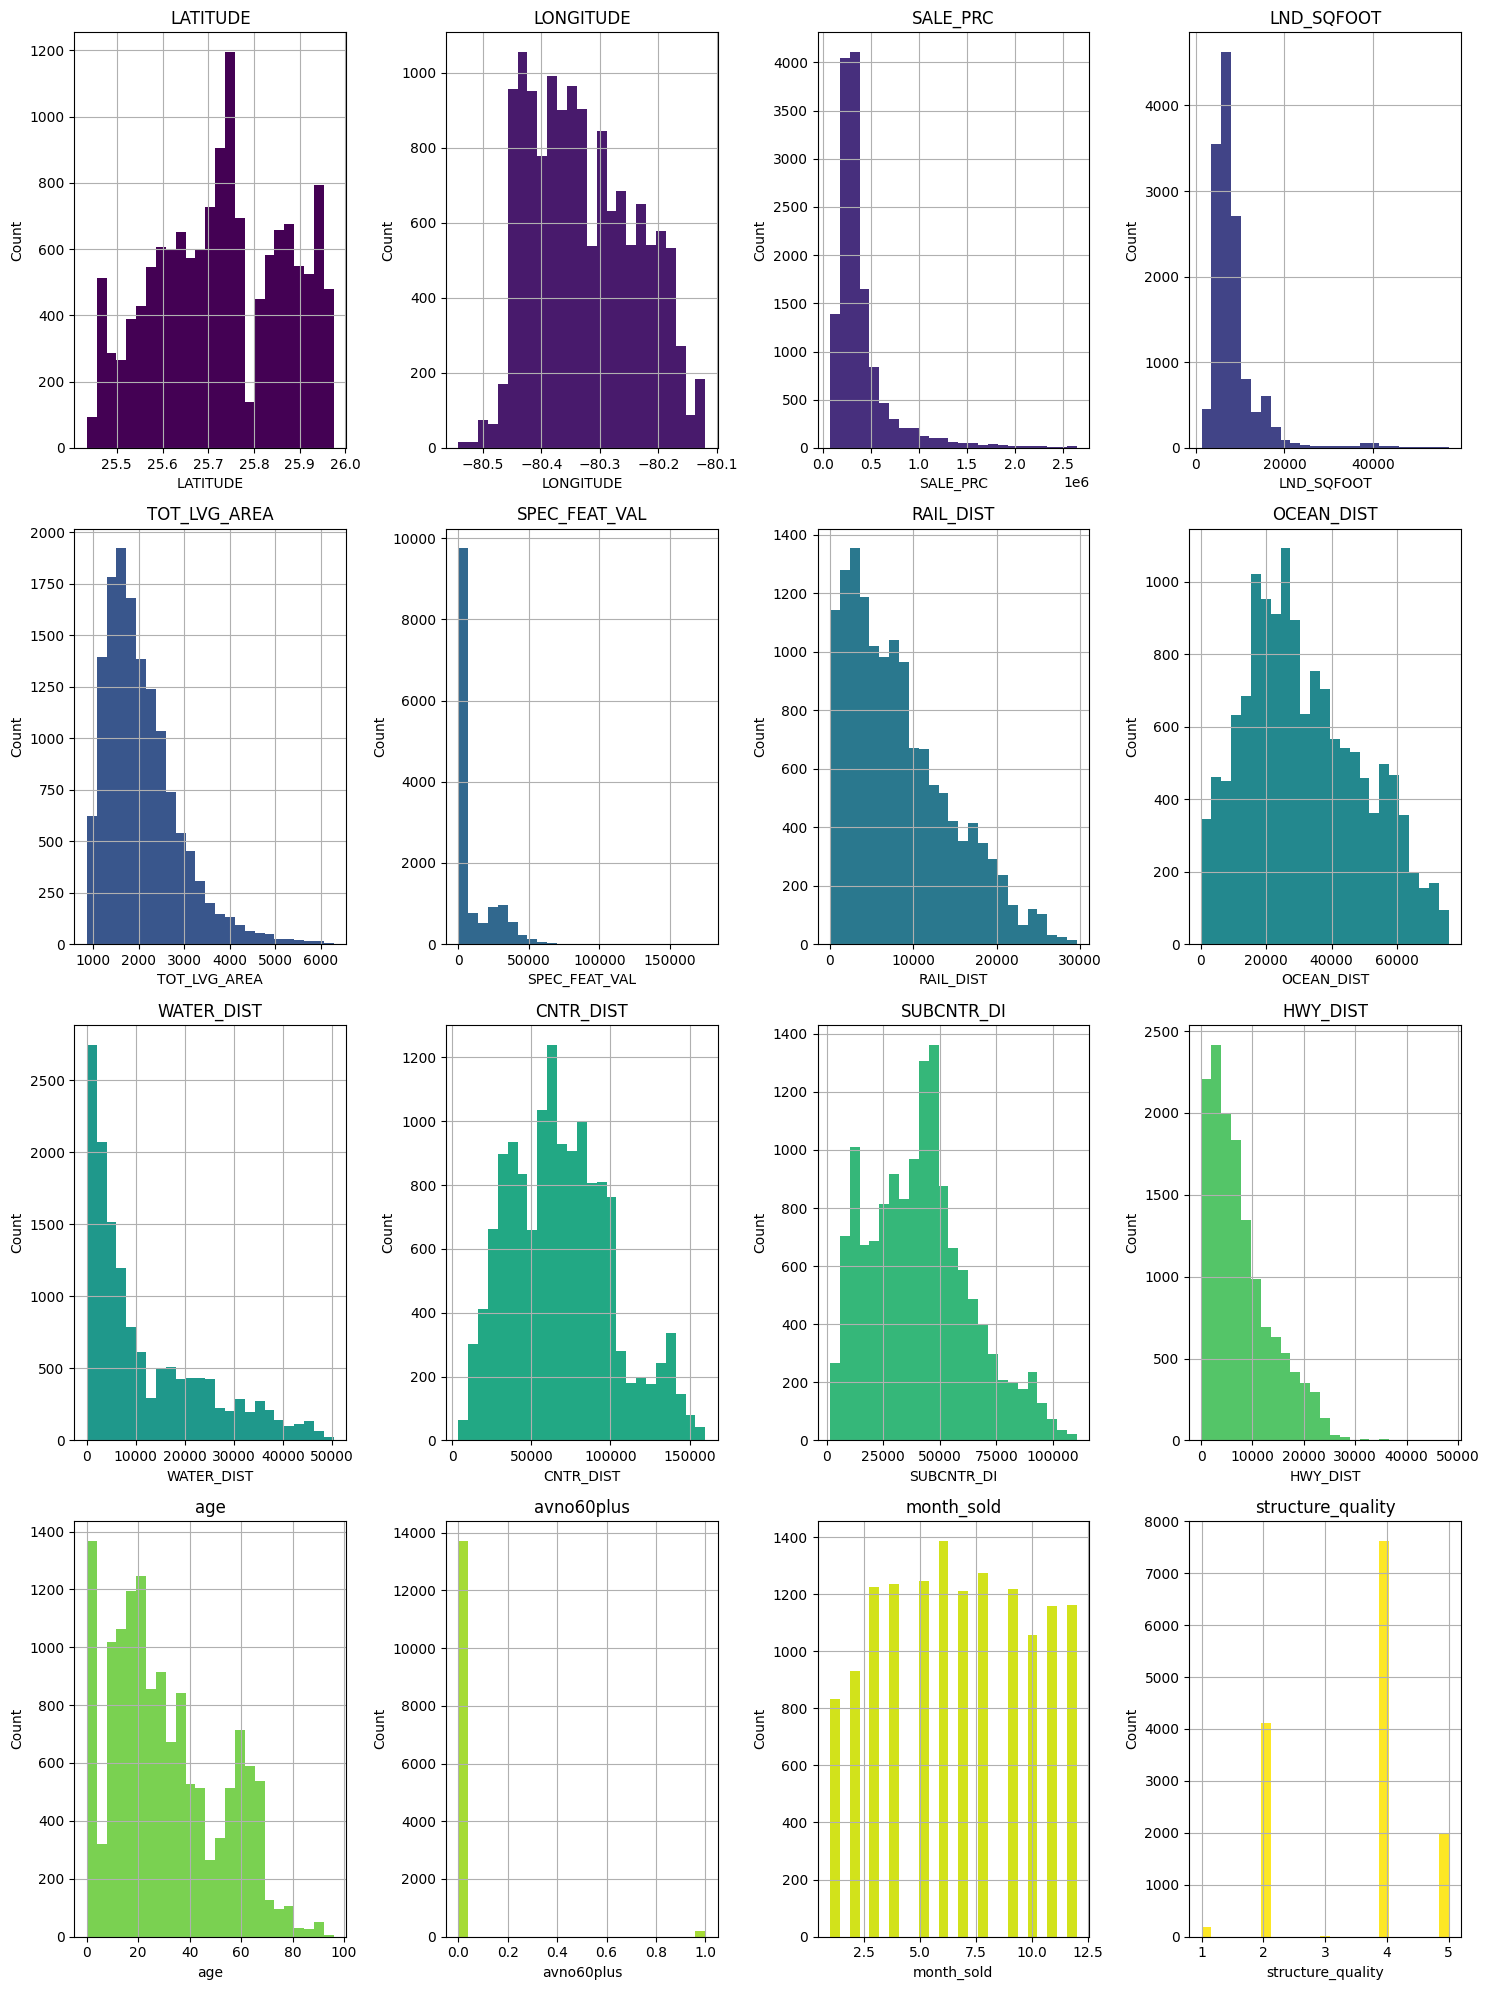

In [ ]:
# We will look at histogram charts for all of the variables

# Wrap the charts to 4 per row since there are 16 plots
num_cols = len(data.columns)
plots_per_row = 4
num_rows = (num_cols + plots_per_row - 1) // plots_per_row

# Define custom colors
colors = plt.cm.viridis(np.linspace(0, 1, num_cols))

# Create subplots with proper spacing
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5*num_rows))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing

# Iterate through columns and plot histograms
for i, (col, color) in enumerate(zip(data.columns, colors)):
    row_index, col_index = divmod(i, plots_per_row)
    ax = axes[row_index, col_index]
    data[col].hist(bins=25, ax=ax, color=color)

    # Set axis labels and title
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.set_title(col)

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


The data seems to be skewed in the frequencies toward the lower end, except for latitude and longitude, which are context-specific to Miami's location.

Also, avno60-plus (a dummy variable for airplane noise over a certain threshold), month sold, and structure quality are discrete categorical variables.

We can visually check for outliers with box plots.

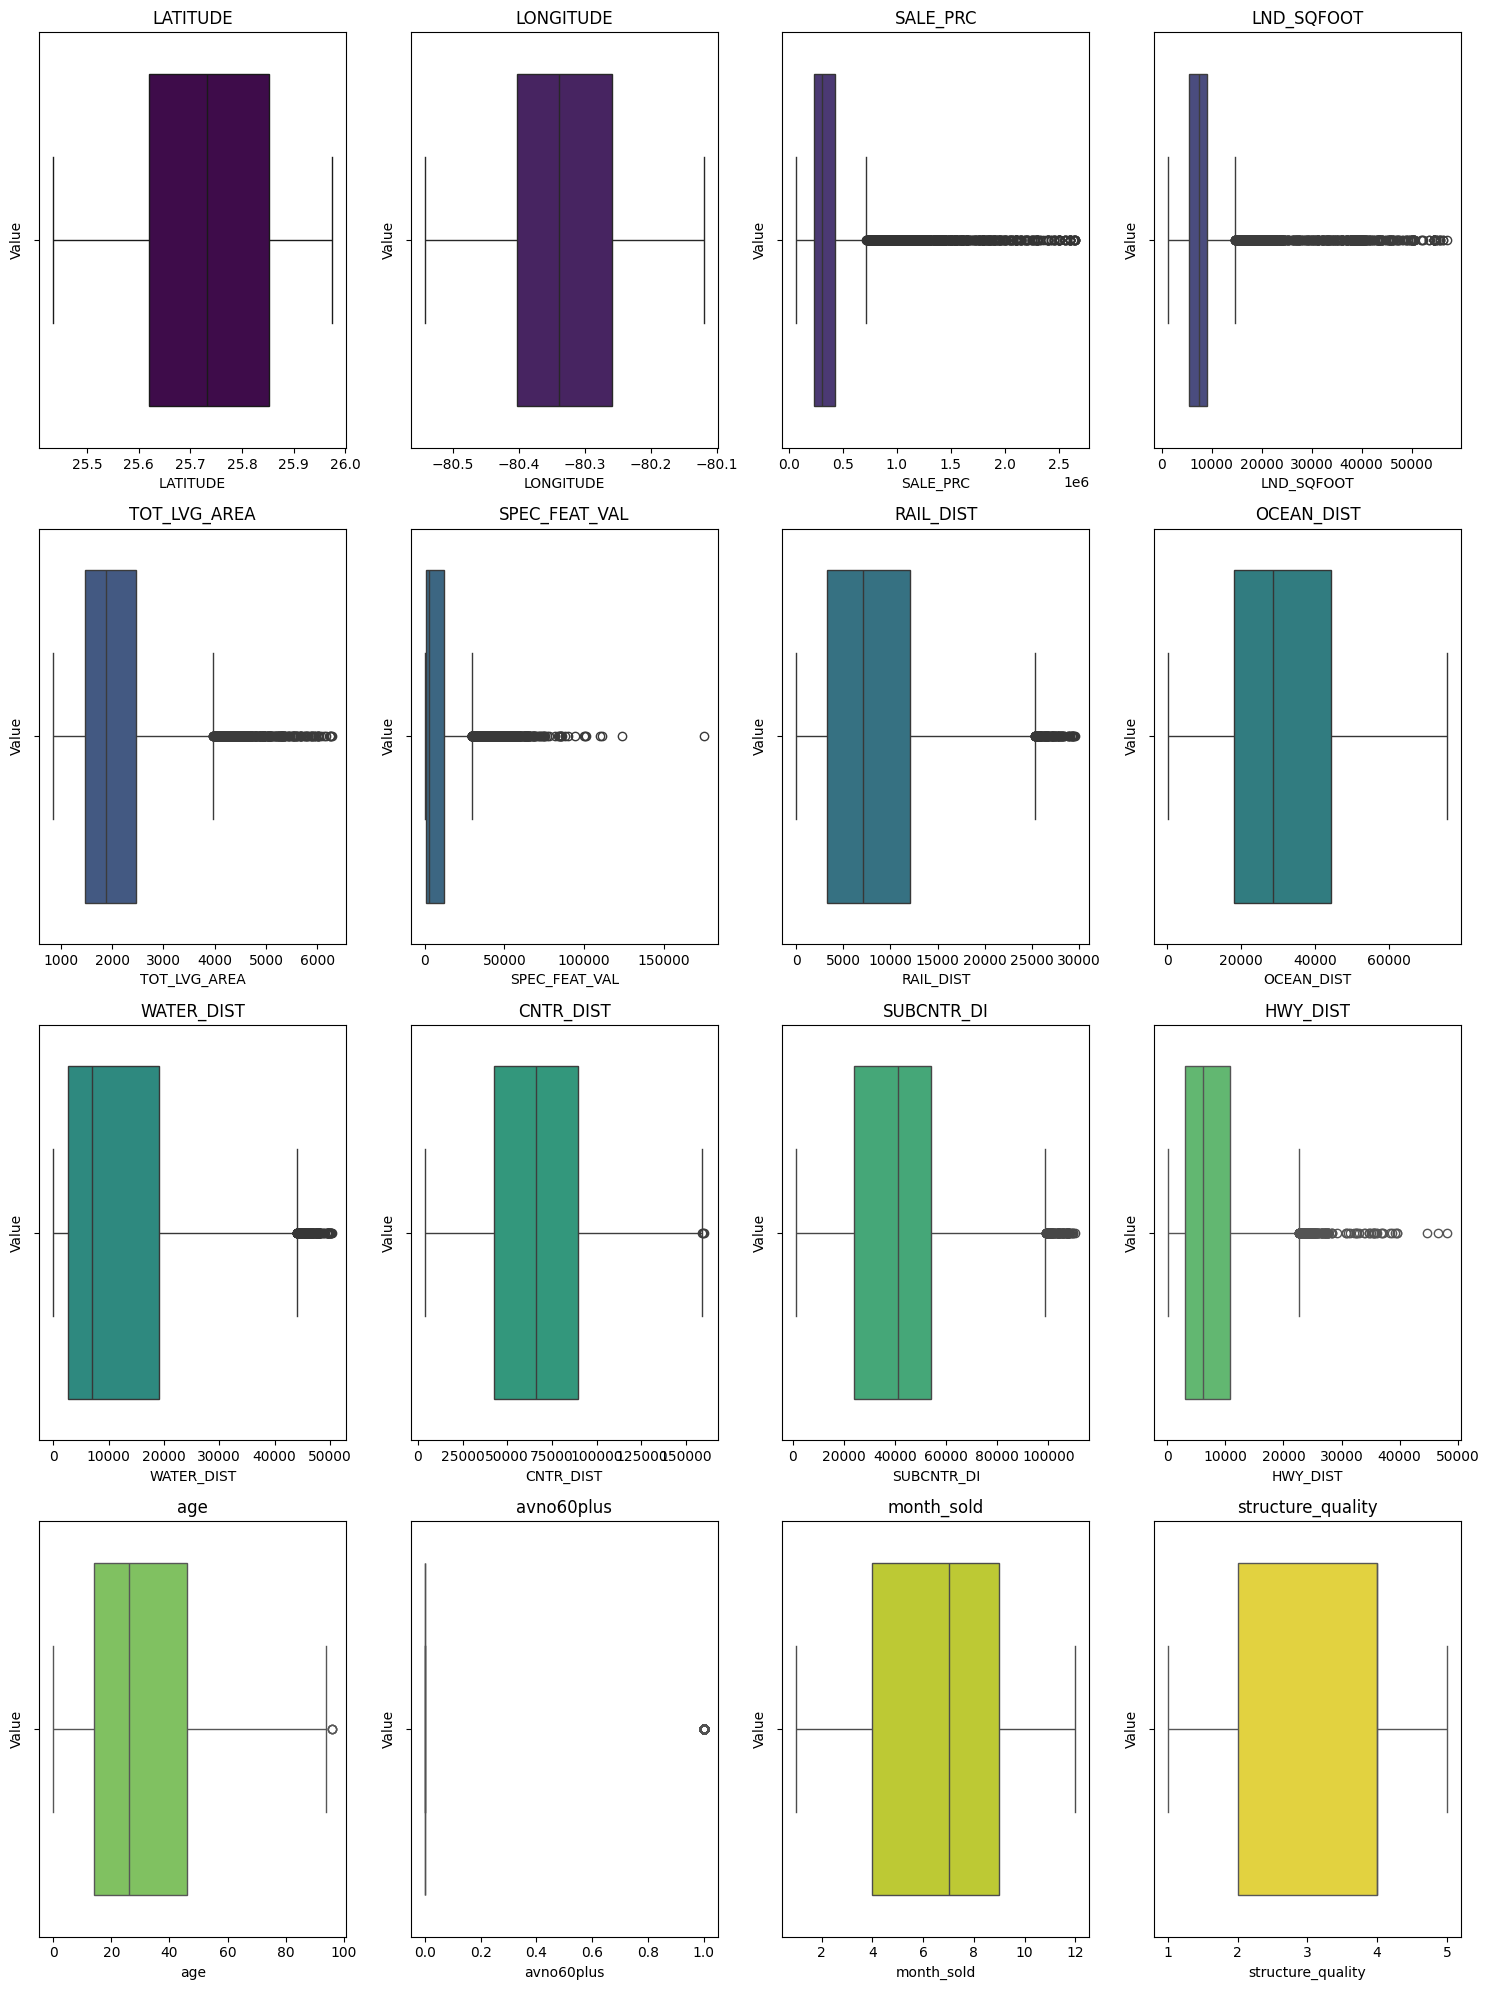

In [ ]:
# Visualize boxplots and check for outliers among the variables

# Wrap the charts to 4 per row since there are 16 charts
num_cols = len(data.columns)
plots_per_row = 4
num_rows = (num_cols + plots_per_row - 1) // plots_per_row

# Define custom colors
colors = plt.cm.viridis(np.linspace(0, 1, num_cols))

# Create subplots with proper spacing
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5*num_rows))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing

# Iterate through columns and plot boxplots
for i, (col, color) in enumerate(zip(data.columns, colors)):
    ax = axes.flatten()[i]
    sns.boxplot(x=data[col], ax=ax, color=color)

    # Set axis labels and title
    ax.set(xlabel=col, ylabel="Value", title=col)

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


Some variables have outliers, but still may hold useful information.

Sale price, square footage of the lot, total living area, and special feature value seem to have many cases on the lower end and higher end outliers.

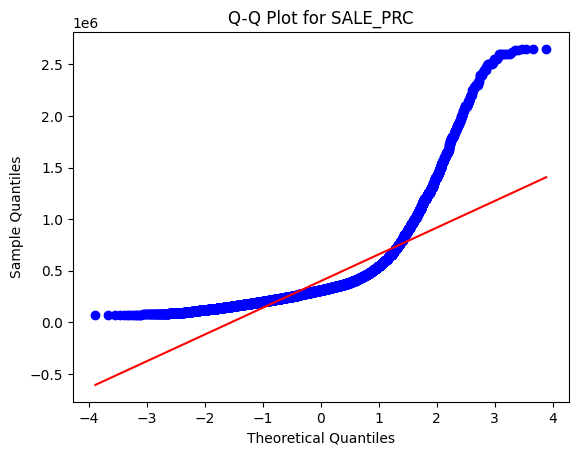

In [ ]:
# Visualize whether SALE_PRC follows a normal distribution using a Q-Q plot

stats.probplot(data['SALE_PRC'], dist='norm', plot=plt)
plt.title('Q-Q Plot for SALE_PRC')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

We can see that at the very least, our outcome variable (sale price) is not normally distributed as it does not closely follow the red reference line. This will present some limitations for analysis; for example, linear regression assumes a normal distribution of data and likely will not perform well as a predictive model for this data.

Regardless, we will use linear regression to see if any type of linear relationship exists between the outcome and predictor variables.

### Bivariate Statistics

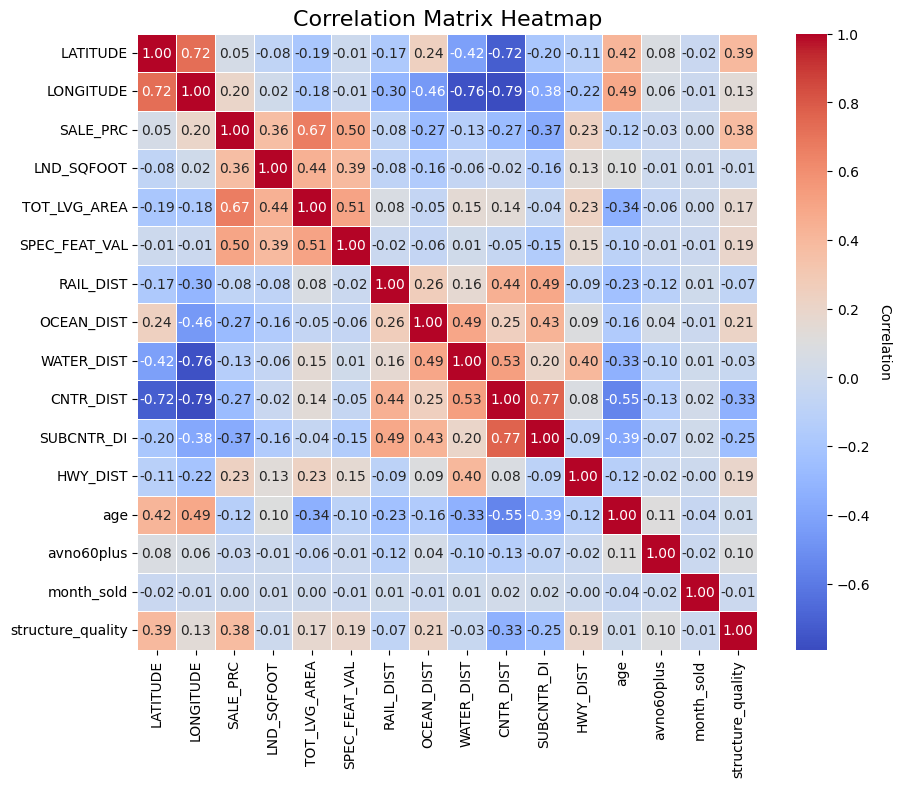

In [ ]:
# Calculate correlation matrix

correlation_matrix = data.corr()

# Create a heatmap

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10})
heatmap.set_title("Correlation Matrix Heatmap", fontsize=16)

# Add colorbar

cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation', rotation=270, labelpad=15)

plt.show()

Sale price seems to have a weak positive correlation with structure quality and square foot of the lot. It has a stronger positive correlation with the total living area and the special features value.

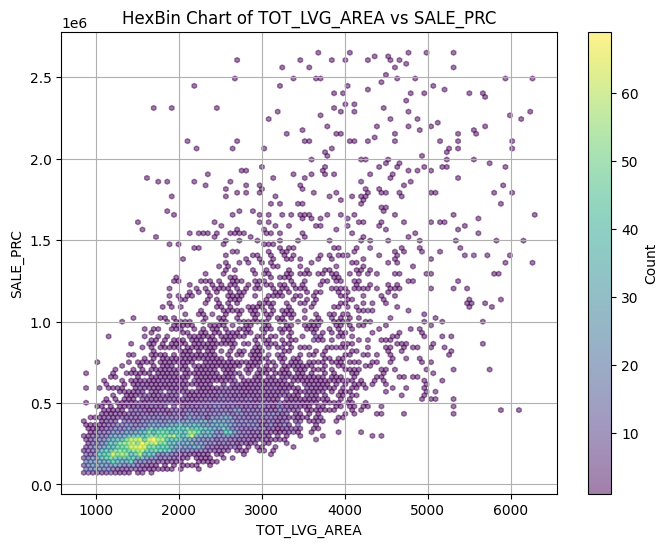

In [ ]:
# Visualize hexagonal bin chart of TOT_LVG_AREA and SALE_PRC

plt.figure(figsize=(8, 6))
plt.hexbin(x=data['TOT_LVG_AREA'], y=data['SALE_PRC'], gridsize=100, cmap='viridis', mincnt=1, alpha=0.5)
plt.title('HexBin Chart of TOT_LVG_AREA vs SALE_PRC')
plt.xlabel('TOT_LVG_AREA')
plt.ylabel('SALE_PRC')
plt.colorbar(label='Count')
plt.grid(True)
plt.show()

The vast majority of houses have a lower total living area and a lower sale price. Increases in total living area generally tend to align with higher sale prices.

But, there are homes that have a high total living area and a low sale price, and vice versa. This may be due to confounding variables, such as homes with lower total living area being in locations that are more desireable, like Pinecrest, Coconut Grove, etc.

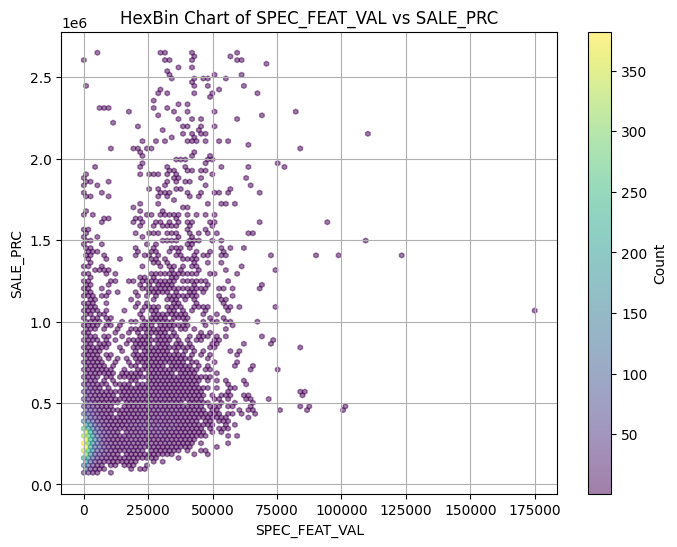

In [ ]:
# Visualize haxagonal bin chart of SPEC_FEAT_VAL and SALE_PRC

plt.figure(figsize=(8, 6))
plt.hexbin(x=data['SPEC_FEAT_VAL'], y=data['SALE_PRC'], gridsize=100, cmap='viridis', mincnt=1, alpha=0.5)
plt.title('HexBin Chart of SPEC_FEAT_VAL vs SALE_PRC')
plt.xlabel('SPEC_FEAT_VAL')
plt.ylabel('SALE_PRC')
plt.colorbar(label='Count')
plt.grid(True)
plt.show()

Interestingly, the special feature values for homes generally tops out at around 50,000 USD.

### Heat Map

In [ ]:
# Create a base map centered at a specific location with CartoDB Dark Matter tiles
map_center = [25.75, -80.25]
map_1 = folium.Map(location=map_center, tiles='cartodb dark_matter', zoom_start=10.25)

# Extract latitude and longitude columns from the housing dataset
location_data = data[['LATITUDE', 'LONGITUDE']]

# Create a HeatMap layer with a specified radius and add it to the map
HeatMap(data=location_data, radius=13).add_to(map_1)

# Display the map
map_1

## Data Preprocessing

In [ ]:
# Prepare training, validation and testing datasets

# According to publisher of dataset on Kaggle, SALE_PRC is outcome variable

X=data.drop(['SALE_PRC'], axis=1)
X.head()

,LATITUDE,LONGITUDE,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [ ]:
# Separate outcome variable SALE_PRC

Y=data['SALE_PRC']
Y.head()

0    440000.0
1    349000.0
2    800000.0
3    988000.0
4    755000.0
Name: SALE_PRC, dtype: float64

In [ ]:
# Convert pandas dataframe/series to numpy array

X_columns=X.columns # Store the column names
X=X.values
Y=Y.values

In [ ]:
# Split the dataset into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print('train:', X_train.shape, Y_train.shape)
print('test:', X_test.shape, Y_test.shape)

train: (11145, 15) (11145,)
test: (2787, 15) (2787,)


In [ ]:
# Apply feature normalization to training, validation and test sets to be able to accurately use machine learning methods with them

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
# Check that our data is stored as a numpy array

type(X_train)

numpy.ndarray

In [ ]:
# Calculate ymax as the maximum value between x and y values
ymax = max(np.max(X), np.max(Y))

Feature normalization is necessary for machine learning models to ensure that a variable does not overly influence a model simply because of the scale of its measurement.

#**Predictive Modeling**

## Linear Regression Model

A linear regression model is a mathematical tool that finds the best-fitting straight line to represent the relationship between two or more variables. It helps predict one variable (the outcome variable) based on the values of others (the predictor variable(s)), using a simple equation. The slope of the line indicates the direction and strength of the relationship.

In [ ]:
# Create the model

linear_model = LinearRegression()

# Fit the training data to the model

linear_model.fit(X_train, Y_train)

# Make predictions using the model on the training data

Y_train_pred_lreg = linear_model.predict(X_train)

# Make predictions using the model on the testing data

Y_test_pred_lreg = linear_model.predict(X_test)

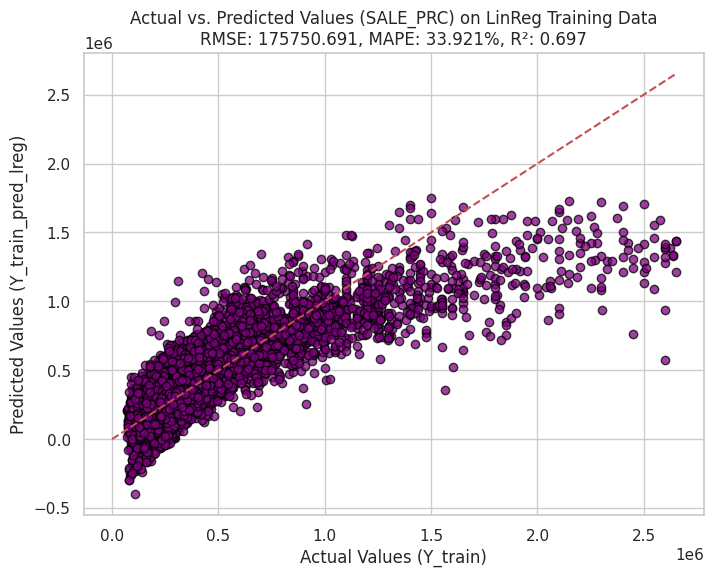

In [ ]:
# Linear Regression Training Data Result

# Calculate metrics
RMSE_train_lreg = math.sqrt(np.mean((Y_train - Y_train_pred_lreg)**2))
MAPE_train_lreg =  np.mean(np.abs(Y_train - Y_train_pred_lreg)/Y_train)
r2_train_lreg = r2_score(Y_train, Y_train_pred_lreg)

# Set seaborn style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_train, Y_train_pred_lreg, alpha=0.75, color='purple', edgecolors='black')

# Add a diagonal line for reference
plt.plot([0, ymax], [0, ymax], '--r')

# Set axis labels
plt.xlabel('Actual Values (Y_train)')
plt.ylabel('Predicted Values (Y_train_pred_lreg)')

# Set plot title with metrics
plt.title(f'Actual vs. Predicted Values (SALE_PRC) on LinReg Training Data\nRMSE: {RMSE_train_lreg:.3f}, MAPE: {MAPE_train_lreg:.3%}, R\u00B2: {r2_train_lreg:.3f}')

# Display the plot
plt.show()

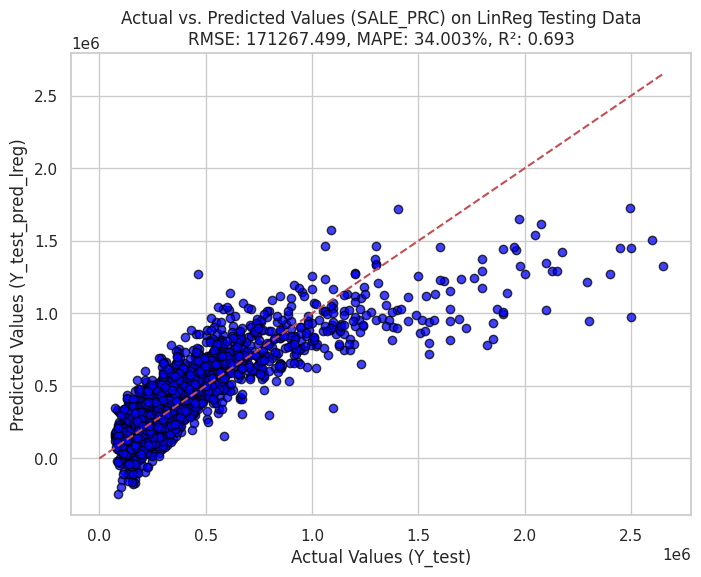

In [ ]:
# Linear Regression Testing Data Result

# Calculate metrics
RMSE_test_lreg = math.sqrt(np.mean((Y_test - Y_test_pred_lreg)**2))
MAPE_test_lreg =  np.mean(np.abs(Y_test - Y_test_pred_lreg)/Y_test)
r2_test_lreg = r2_score(Y_test, Y_test_pred_lreg)

# Set seaborn style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test_pred_lreg, alpha=0.75, color='blue', edgecolors='black')

# Add a diagonal line for reference
plt.plot([0, ymax], [0, ymax], '--r')

# Set axis labels
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_test_pred_lreg)')

# Set plot title with metrics
plt.title(f'Actual vs. Predicted Values (SALE_PRC) on LinReg Testing Data\nRMSE: {RMSE_test_lreg:.3f}, MAPE: {MAPE_test_lreg:.3%}, R\u00B2: {r2_test_lreg:.3f}')

# Display the plot
plt.show()

The root mean square error (RMSE) explains the average size of the errors in the predictions. A lower RMSE indicates a better alignment between predicted and actual values. For this linear regression model, the RMSE is 171,000 USD. This is fairly high, considering that more than 75% of the data lie below a 500,000 dollar sale price.

The mean absolute percentage error (MAPE) explains the average percentage difference between the predicted and the actual values. In this model, the MAPE is approximately 34%, which indicates that on average, the model's predictions are off by 34% from the actual sale price. This is not an ideal percentage for a predictive model.

The R-squared value (aka the coefficient of determination) is a value ranging from 0 to 1 that shows how well the variability of the outcome variable is explained by the predictor variables. A value of 0.69 in this model indicates that more than half of the variability in the sale price can be explained by the predictor variables.

The visualization of the predicted values against the actual values shows that this model isn't necessarily an inadequate model for more than 75% of the data, which lie below a sale price of 500,000 USD. However, at sale prices exceeding 1,000,000 USD, the model tends to predict a substantially lower sale price than the actual sale price. This may indicate that there are variables not captured in this dataset that contribute to a higher sale price of a home in Miami, or there could be non-linear relationships between the variables.

## KNeighbors Regression

A K-Nearest Neighbors (KNN) regression model predicts the value of a target variable by considering the average of the values of its nearest neighbors in the feature space. It works by finding the *k* data points closest to a given input and averaging their target values to make predictions. KNN is a simple, yet effective, method for regression tasks and doesn't assume a specific functional form for the relationship between variables.

In [ ]:
# We will build a KNN regression model by using 10-fold cross-validation to select the optimal number of neighbors

# Define hyperparameters
neighbors_list = np.arange(1, 21)

# Initialize lists to store results
MAPE_average_list_knr = []

#Create scoring algorithm
def my_scorer(model, X, y):
    y_pred_knr = model.predict(X)
    MAPE =  np.mean(np.abs(y_pred_knr - y)/y)
    return MAPE

# Iterate over hyperparameters
for neighbors in neighbors_list:
    # Create KNN Regressor with the current hyperparameter
    knr = KNeighborsRegressor(n_neighbors=neighbors)

    # Perform 10-fold cross-validation and calculate MAPE
    MAPE_array_knr = cross_val_score(knr, X_train, Y_train, cv=10, scoring=my_scorer, n_jobs=4)

    # Calculate and store the average MAPE
    MAPE_average_list_knr.append(np.mean(MAPE_array_knr))

# Convert the list to a NumPy array
MAPE_average_array_knr = np.array(MAPE_average_list_knr)

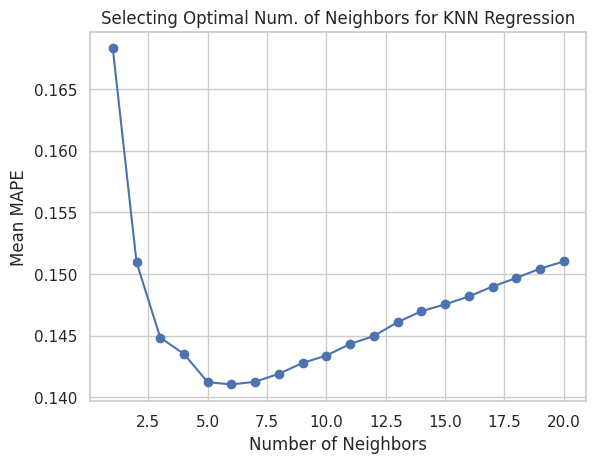

Optimal Neighbors: 6


In [ ]:
# Plot n_neighbors vs. MAPE
plt.plot(neighbors_list, MAPE_average_array_knr, marker='o')
plt.title('Selecting Optimal Num. of Neighbors for KNN Regression')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean MAPE')
plt.show()

# Identify optimal number of neighbors
optimal_neighbors = neighbors_list[np.argmin(MAPE_average_array_knr)]
print(f'Optimal Neighbors: {optimal_neighbors}')

Selecting the optimal number of neighbors for a KNN regression model is important. If the number of neighbors is too small, the model may be overly sensitive to noise in the training data, leading to overfitting. On the contrary, if the number of neighbors is too large, the model may become too simplistic and fail to capture underlying patterns in the data, resulting in underfitting.

In [ ]:
# Build KNN Regressor with the optimal hyperparameter
knr = KNeighborsRegressor(n_neighbors=optimal_neighbors)

# Fit the model on the training data
knr.fit(X_train, Y_train)

# Predictions on training set
Y_train_pred_knr = knr.predict(X_train)

# Predictions on test set
Y_test_pred_knr = knr.predict(X_test)

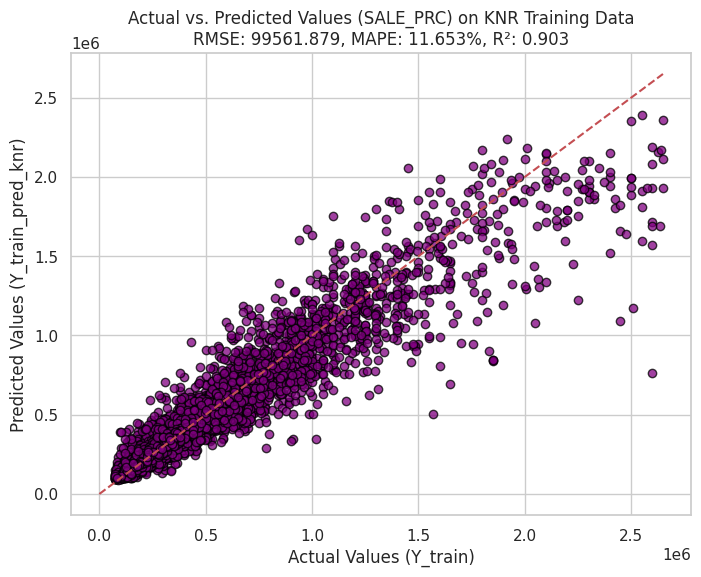

In [ ]:
# KNN Regression Training Data Result

# Calculate metrics
RMSE_train_knr = math.sqrt(np.mean((Y_train - Y_train_pred_knr)**2))
r2_train_knr = r2_score(Y_train, Y_train_pred_knr)
MAPE_train_knr =  np.mean(np.abs(Y_train - Y_train_pred_knr)/Y_train)

# Set seaborn style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_train, Y_train_pred_knr, alpha=0.75, color='purple', edgecolors='black')

# Add a diagonal line for reference
plt.plot([0, ymax], [0, ymax], '--r')

# Set axis labels
plt.xlabel('Actual Values (Y_train)')
plt.ylabel('Predicted Values (Y_train_pred_knr)')

# Set plot title with metrics
plt.title(f'Actual vs. Predicted Values (SALE_PRC) on KNR Training Data\nRMSE: {RMSE_train_knr:.3f}, MAPE: {MAPE_train_knr:.3%}, R\u00B2: {r2_train_knr:.3f}')

# Display the plot
plt.show()

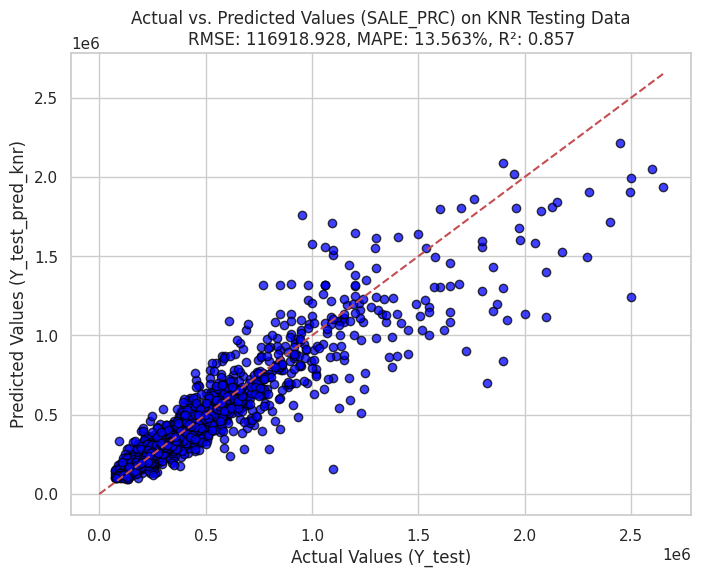

In [ ]:
# KNN Regression Testing Data Result

# Calculate metrics
RMSE_test_knr = math.sqrt(np.mean((Y_test - Y_test_pred_knr)**2))
MAPE_test_knr =  np.mean(np.abs(Y_test - Y_test_pred_knr)/Y_test)
r2_test_knr = r2_score(Y_test, Y_test_pred_knr)

# Set seaborn style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test_pred_knr, alpha=0.75, color='blue', edgecolors='black')

# Add a diagonal line for reference
plt.plot([0, ymax], [0, ymax], '--r')

# Set axis labels
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_test_pred_knr)')

# Set plot title with metrics
plt.title(f'Actual vs. Predicted Values (SALE_PRC) on KNR Testing Data\nRMSE: {RMSE_test_knr:.3f}, MAPE: {MAPE_test_knr:.3%}, R\u00B2: {r2_test_knr:.3f}')

# Display the plot
plt.show()

This KNN regression model seems to perform better on unseen data than the previous linear regression model. This is indicated by all of the performance metrics: the lower RMSE at 117,000 USD, the lower MAPE at 13.5%, and the higher R-squared value at 0.86.

This model also seems adequate for homes that are priced below 500,000 USD; but, like the linear regression model, it seems to perform more poorly at homes priced above 1,000,000 USD. Similarly, the model seems to underpredict sale prices in the higher price range, but it does so more accurately than the linear regression model.

## Random Forest Regressor

A Random Forest regression model is an ensemble method that combines the predictions of multiple decision trees to make accurate predictions. It builds a "forest" of trees, each trained on a different subset of the data and features. The model aggregates the individual tree predictions to provide a robust and often more accurate prediction for regression tasks. Random Forest is known for its flexibility, ability to handle complex relationships (such as non-linear relationships), and resistance to overfitting.

In [ ]:
# Build a Random Forest regression model by using 10-fold cross-validation to tune the max tree depth hyperparameter

# Define hyperparameters
max_depth_list = np.arange(1, 30, 2, dtype=int)

# Initialize lists to store results
MAPE_average_list_RF = []

#Create scoring algorithm
def my_scorer(model, X, y):
    y_pred_RF = model.predict(X)
    MAPE =  np.mean(np.abs(y_pred_RF - y)/y)
    return MAPE

# Iterate over hyperparameters
for max_depth in max_depth_list:
    # Create RandomForest Regressor with the current hyperparameter
    RF = RandomForestRegressor(max_depth=max_depth, n_estimators=15, random_state=0)

    # Perform 10-fold cross-validation and calculate MAPE
    MAPE_array_RF = cross_val_score(RF, X_train, Y_train, cv=10, scoring=my_scorer, n_jobs=4)

    # Calculate and store the average MAPE
    MAPE_average_list_RF.append(np.mean(MAPE_array_RF))

# Convert the list to a NumPy array
MAPE_average_array_RF = np.array(MAPE_average_list_RF)

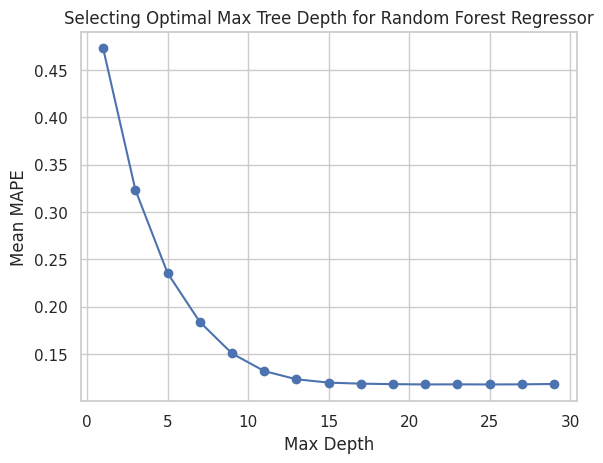

Optimal Max Tree Depth: 25


In [ ]:
# Plot hyperparameter vs. MAPE
plt.plot(max_depth_list, MAPE_average_array_RF, marker='o')
plt.title('Selecting Optimal Max Tree Depth for Random Forest Regressor')
plt.xlabel('Max Depth')
plt.ylabel('Mean MAPE')
plt.show()

# Identify optimal max tree depth
optimal_max_depth = max_depth_list[np.argmin(MAPE_average_array_RF)]
print(f'Optimal Max Tree Depth: {optimal_max_depth}')

Optimizing the max tree depth hyperparameter in a Random Forest regression model is essential for achieving a balance between model complexity and generalization, avoiding overfitting or underfitting, and ensuring efficient and interpretable model performance.

In [ ]:
# Build RandomForest Regressor with best hyperparameter
RF = RandomForestRegressor(n_estimators=15, max_depth=optimal_max_depth, random_state=0)

# Fit the model on the training data
RF.fit(X_train, Y_train)

# Predictions on training set
Y_train_pred_RF = RF.predict(X_train)

# Predictions on test set
Y_test_pred_RF = RF.predict(X_test)

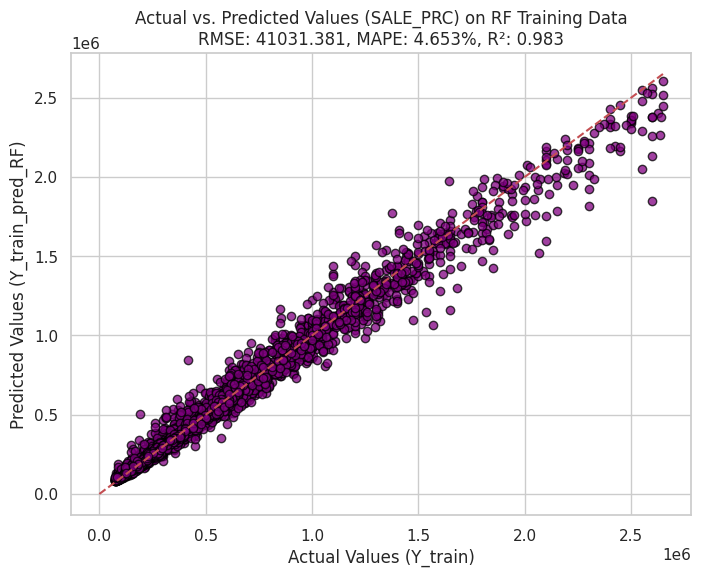

In [ ]:
# Random Forest Regression Training Data Result

# Calculate metrics
RMSE_train_RF = math.sqrt(np.mean((Y_train - Y_train_pred_RF)**2))
r2_train_RF = r2_score(Y_train, Y_train_pred_RF)
MAPE_train_RF =  np.mean(np.abs(Y_train - Y_train_pred_RF)/Y_train)

# Set seaborn style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_train, Y_train_pred_RF, alpha=0.75, color='purple', edgecolors='black')

# Add a diagonal line for reference
plt.plot([0, ymax], [0, ymax], '--r')

# Set axis labels
plt.xlabel('Actual Values (Y_train)')
plt.ylabel('Predicted Values (Y_train_pred_RF)')

# Set plot title with metrics
plt.title(f'Actual vs. Predicted Values (SALE_PRC) on RF Training Data\nRMSE: {RMSE_train_RF:.3f}, MAPE: {MAPE_train_RF:.3%}, R\u00B2: {r2_train_RF:.3f}')

# Display the plot
plt.show()

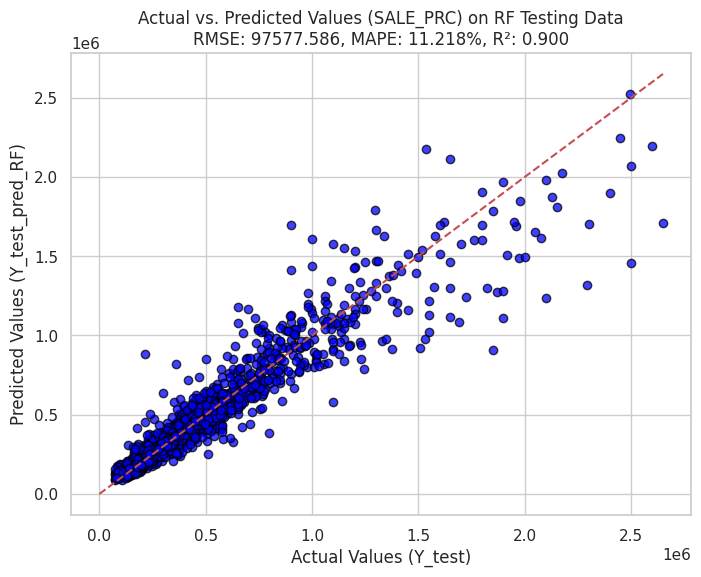

In [ ]:
# Random Forest Regression Testing Data Result

# Calculate metrics
RMSE_test_RF = math.sqrt(np.mean((Y_test - Y_test_pred_RF)**2))
MAPE_test_RF =  np.mean(np.abs(Y_test - Y_test_pred_RF)/Y_test)
r2_test_RF = r2_score(Y_test, Y_test_pred_RF)

# Set seaborn style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test_pred_RF, alpha=0.75, color='blue', edgecolors='black')

# Add a diagonal line for reference
plt.plot([0, ymax], [0, ymax], '--r')

# Set axis labels
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_test_pred_RF)')

# Set plot title with metrics
plt.title(f'Actual vs. Predicted Values (SALE_PRC) on RF Testing Data\nRMSE: {RMSE_test_RF:.3f}, MAPE: {MAPE_test_RF:.3%}, R\u00B2: {r2_test_RF:.3f}')

# Display the plot
plt.show()

The Random Forest model seems to perform better than both the linear regression and the KNN regression model, as seen in all of the performance metrics, with a lower RMSE at 97,500 USD, a MAPE of 11% and R-squared value of 0.9 on unseen data.

The spread of predicted vs. actual values tends to be small, even for homes priced in the 1,000,000 dollar and lower range, which makes this model more usable for a larger percentage of the data. However, like the other models, it seems to suffer from poorer performance when predicting the sale price of homes in the higher end range, particularly for homes priced above 1,250,000 USD. Most homes priced above 1,500,000 USD are predicted to have a substantially lower price than their actual sale price.

Because of the good performance of this model, the feature importance will be explored below.

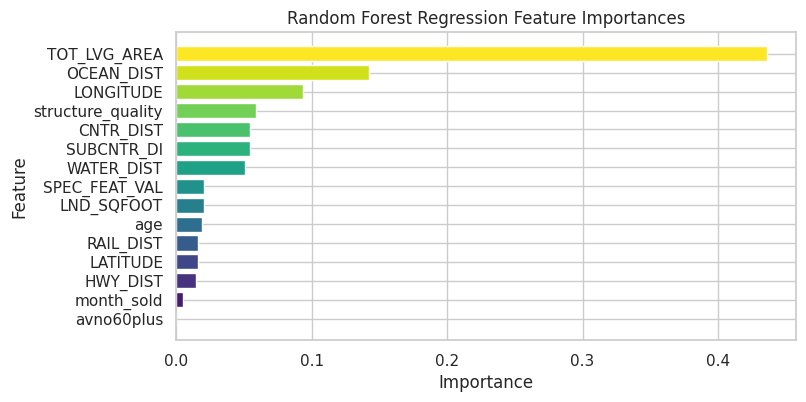

In [ ]:
# Plot the feature importance

# Get feature importances
feature_importances = RF.feature_importances_

# Get corresponding feature names
feature_names = X_columns

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Define a colormap
colormap = plt.get_cmap('viridis')

# Plotting with horizontal bars, most important variables at the top, and varying colors
plt.figure(figsize=(8, 4))
bars = plt.barh(range(len(feature_importances)), feature_importances[sorted_indices][::-1],
                color=[colormap(i) for i in np.linspace(0, 1, len(feature_importances))])

plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regression Feature Importances')

plt.show()

The feature importance plot for a Random Forest regression model visually represents the importance of each input variable in predicting the target. It quantifies the contribution of each feature in reducing prediction error across the ensemble of decision trees. Longer bars in the plot indicate higher importance, offering insights into the most influential factors for the model's predictions and supporting feature selection decisions.

We can see that for this Random Forest regression model, the overwhelmingly important feature is the total living area. Total living area has a moderately high correlation with sale price, so it makes sense that this would be an important feature in this model.

## XGB Regressor

XGBoost (Extreme Gradient Boosting) is a powerful regression model that sequentially builds a series of weak learners (typically decision trees) and combines their predictions to create a strong overall model.

XGBoost sequentially adds decision trees, each correcting the errors of the previous ones, and combines their predictions to produce a robust and accurate regression model. It incorporates regularization techniques to prevent overfitting. XGBoost is known for its speed, scalability, and ability to handle complex relationships in the data.

In [ ]:
#Find optimal max_depth for XGBoost

# Define hyperparameters
max_depth_list_XGB = np.arange(1, 30, 2, dtype=int)

# Initialize list to store results
MAPE_average_list_XGB = []

#Create scoring algorithm
def my_scorer(model, X, y):
    y_pred_XGB = model.predict(X)
    MAPE =  np.mean(np.abs(y_pred_XGB - y)/y)
    return MAPE

# Iterate over hyperparameters
for max_depth in max_depth_list_XGB:
    # Create XGB Regressor with the current hyperparameter
    xgb = XGBRegressor(max_depth=max_depth, n_estimators=15, random_state=0, objective='reg:squarederror')

    # Perform 10-fold cross-validation and calculate MAPE
    MAPE_array_XGB = cross_val_score(xgb, X_train, Y_train, cv=10, scoring=my_scorer, n_jobs=4)

    # Calculate and store the average MAPE
    MAPE_average_list_XGB.append(np.mean(MAPE_array_XGB))

# Convert the list to a NumPy array
MAPE_average_array_XGB = np.array(MAPE_average_list_XGB)


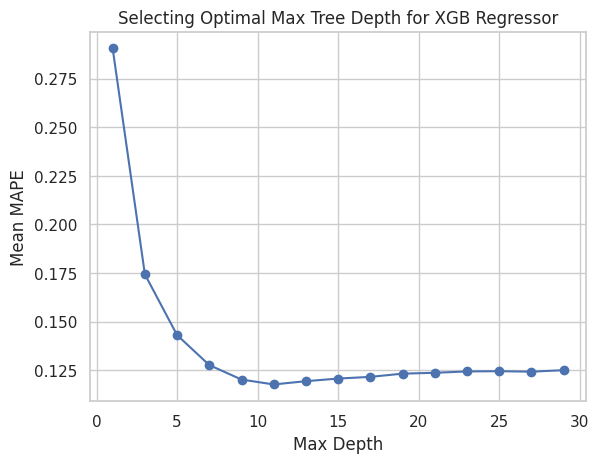

Optimal Max Tree Depth: 11


In [ ]:
# Plot max tree depth vs. MAPE
plt.plot(max_depth_list_XGB, MAPE_average_array_XGB, marker='o')
plt.title('Selecting Optimal Max Tree Depth for XGB Regressor')
plt.xlabel('Max Depth')
plt.ylabel('Mean MAPE')
plt.show()

# Identify optimal max tree depth
optimal_max_depth_XGB = max_depth_list_XGB[np.argmin(MAPE_average_array_XGB)]
print(f'Optimal Max Tree Depth: {optimal_max_depth_XGB}')

Similar to the Random Forest regression model, optimizing the max tree depth hyperparameter in the XGBoost regression model is essential to ensure that the model performs well and avoids overfitting or underfitting the data.

In [ ]:
# Build XGB Regressor with best hyperparameter
xgb = XGBRegressor(max_depth=optimal_max_depth_XGB, n_estimators=15, random_state=0, objective='reg:squarederror')

# Fit the model on the training data
xgb.fit(X_train, Y_train)

# Predictions on training set
Y_train_pred_xgb = xgb.predict(X_train)

# Predictions on test set
Y_test_pred_xgb = xgb.predict(X_test)

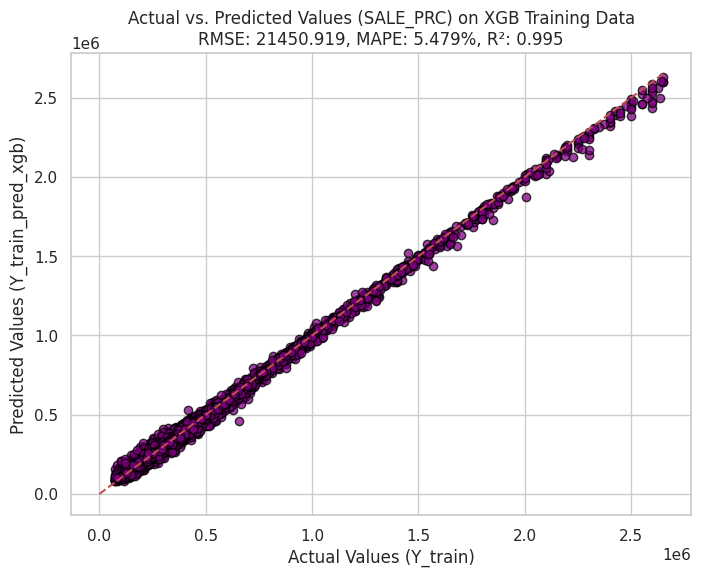

In [ ]:
# XG Boost Regression Training Data Result

# Calculate metrics
RMSE_train_xgb = math.sqrt(np.mean((Y_train - Y_train_pred_xgb)**2))
r2_train_xgb = r2_score(Y_train, Y_train_pred_xgb)
MAPE_train_xgb =  np.mean(np.abs(Y_train - Y_train_pred_xgb)/Y_train)

# Set seaborn style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_train, Y_train_pred_xgb, alpha=0.75, color='purple', edgecolors='black')

# Add a diagonal line for reference
plt.plot([0, ymax], [0, ymax], '--r')

# Set axis labels
plt.xlabel('Actual Values (Y_train)')
plt.ylabel('Predicted Values (Y_train_pred_xgb)')

# Set plot title with metrics
plt.title(f'Actual vs. Predicted Values (SALE_PRC) on XGB Training Data\nRMSE: {RMSE_train_xgb:.3f}, MAPE: {MAPE_train_xgb:.3%}, R\u00B2: {r2_train_xgb:.3f}')

# Display the plot
plt.show()

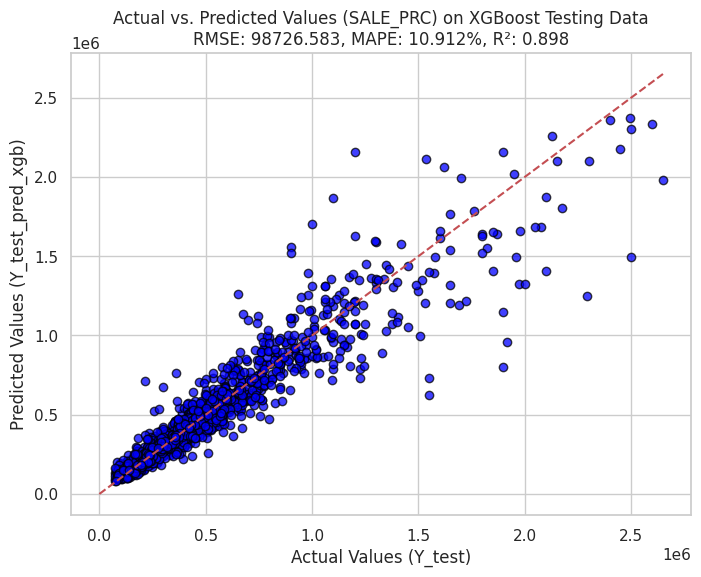

In [ ]:
# XG Boost Regression Testing Data Result

# Calculate metrics
RMSE_test_xgb = math.sqrt(np.mean((Y_test - Y_test_pred_xgb)**2))
MAPE_test_xgb =  np.mean(np.abs(Y_test - Y_test_pred_xgb)/Y_test)
r2_test_xgb = r2_score(Y_test, Y_test_pred_xgb)

# Set seaborn style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test_pred_xgb, alpha=0.75, color='blue', edgecolors='black')

# Add a diagonal line for reference
plt.plot([0, ymax], [0, ymax], '--r')

# Set axis labels
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_test_pred_xgb)')

# Set plot title with metrics
plt.title(f'Actual vs. Predicted Values (SALE_PRC) on XGBoost Testing Data\nRMSE: {RMSE_test_xgb:.3f}, MAPE: {MAPE_test_xgb:.3%}, R\u00B2: {r2_test_xgb:.3f}')

# Display the plot
plt.show()

We can observe that the XGBoost regression model has similar performance to the Random Forest regression model. The RMSE is slighlty higher, the MAPE is slightly lower, and the R-squared value is slightly lower.

The model also shows similar performance to the Random Forest regression model on unseen data in both the lower and higher sale price ranges, with sale prices over 1,000,000 USD being much less predictable than lower sale prices.

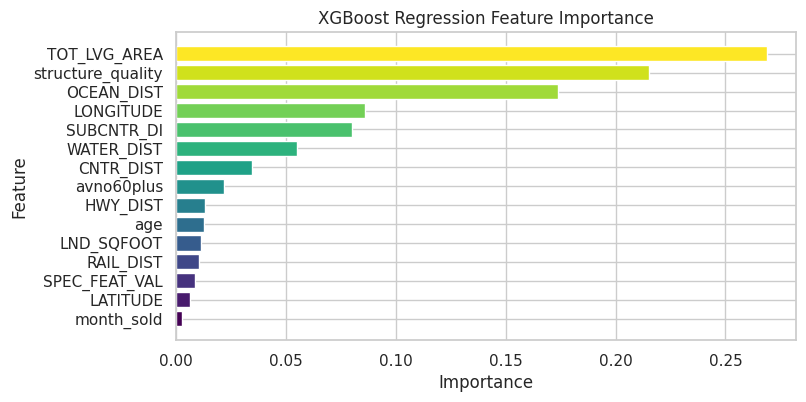

In [ ]:
# Plot the feature importance

# Get feature importances
feature_importances = xgb.feature_importances_

# Get corresponding feature names
feature_names = X_columns

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Define a colormap
colormap = plt.get_cmap('viridis')

# Plotting with horizontal bars, most important variables at the top, and varying colors
plt.figure(figsize=(8, 4))
bars = plt.barh(range(len(feature_importances)), feature_importances[sorted_indices][::-1],
                color=[colormap(i) for i in np.linspace(0, 1, len(feature_importances))])

plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Regression Feature Importance')

plt.show()

One way in which the XGBoost regression model differs from the Random Forest regression model is in feature importance.

For this XGBoost model, the total living area is still the most important feature for predicting the sale price of a home in the dataset, but structure quality and distance from the ocean are also seen to be important features.

## Model Comparison

In [ ]:
# Create a list of the models used and their evaluation metrics
model_list = [
    {'Model Name': 'Linear Regression', 'RMSE': RMSE_test_lreg, 'MAPE': MAPE_test_lreg, 'R\u00B2': r2_test_lreg},
    {'Model Name': 'KNN Regression', 'RMSE': RMSE_test_knr, 'MAPE': MAPE_test_knr, 'R\u00B2': r2_test_knr},
    {'Model Name': 'Random Forest Regression', 'RMSE': RMSE_test_RF, 'MAPE': MAPE_test_RF, 'R\u00B2': r2_test_RF},
    {'Model Name': 'XG Boost Regression', 'RMSE': RMSE_test_xgb, 'MAPE': MAPE_test_xgb, 'R\u00B2': r2_test_xgb}

]

# Define headers
headers = ['Model Name', 'RMSE', 'MAPE', 'R\u00B2']

# Convert the list of dictionaries to a DataFrame with headers

model_list_df = pd.DataFrame(model_list, columns=headers)

# Display the model list

model_list_df.head()

,Model Name,RMSE,MAPE,R²
0,Linear Regression,171267.499214,0.340028,0.693073
1,KNN Regression,116918.928000,0.135630,0.856961
2,Random Forest Regression,97577.586065,0.112180,0.900371
3,XG Boost Regression,98726.582513,0.109121,0.898011


It is not clear which model would be the optimal model for predicting the sale price of a home in this data set. All of the models suffer from under-predicting the sale price of homes that are in the higher end range, specifically homes priced over 1,000,000 USD.

The performance of the linear regression and the KNN regression models would be the worse choices to use, indicated by the evaluation metrics.

The ensemble models (Random Forest and XGBoost) have both better and similar evaluation metrics, and either would be a great choice for predicting the sale price of more than 75% of the homes in the data set.

The best way to improve the performance of the RF or XGB models would be to include more observations, such as by collecting a larger sample, and/or by including more features that may help to explain the relationship between the variables and sale price for  homes in the very high sale price range.